# Network Analysis

In [ ]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
color = sns.color_palette
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix


### Load data into `networkx` graph

In [ ]:
#Charger le fichier dans un graphe
G = nx.read_gml('/content/netscience.gml', label="id", destringizer=int)


In [ ]:

# Afficher les informations sur le graphe
print("Informations sur le graphe :")
print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d'arêtes :", G.number_of_edges())


Informations sur le graphe :
Nombre de nœuds : 1589
Nombre d'arêtes : 2742


In [ ]:
#Vérifier si le graphe est dirigé
print("Le graphe est dirigé :",nx.is_directed(G))

#Vérifier si le graphe est vide
print("Le graphe est vide :",nx.is_empty(G) )

#Vérifier si le graphe est bipartie
print("Le graphe est bipartie :",nx.is_bipartite(G))

#Vérifier si le graphe est biconnecté
print(" Le graphe est biconnecté :",nx.is_biconnected(G))

#Vérifier si le graphe est connecté
print("Le graphe est Connecté :",nx.is_connected(G))

Le graphe est dirigé : False
Le graphe est vide : False
Le graphe est bipartie : False
 Le graphe est biconnecté : False
Le graphe est Connecté : False


In [ ]:
# Afficher la liste des nœuds avec leurs étiquettes
print("\nListe des nœuds avec leurs étiquettes :")
for node in G.nodes(data=True):
    print("ID:", node[0], "| Label:", node[1]["label"])


Liste des nœuds avec leurs étiquettes :
ID: 0 | Label: ABRAMSON, G
ID: 1 | Label: KUPERMAN, M
ID: 2 | Label: ACEBRON, J
ID: 3 | Label: BONILLA, L
ID: 4 | Label: PEREZVICENTE, C
ID: 5 | Label: RITORT, F
ID: 6 | Label: SPIGLER, R
ID: 7 | Label: ADAMIC, L
ID: 8 | Label: ADAR, E
ID: 9 | Label: HUBERMAN, B
ID: 10 | Label: LUKOSE, R
ID: 11 | Label: PUNIYANI, A
ID: 12 | Label: AERTSEN, A
ID: 13 | Label: GERSTEIN, G
ID: 14 | Label: HABIB, M
ID: 15 | Label: PALM, G
ID: 16 | Label: AFRAIMOVICH, V
ID: 17 | Label: VERICHEV, N
ID: 18 | Label: RABINOVICH, M
ID: 19 | Label: AGRAWAL, H
ID: 20 | Label: AHUJA, R
ID: 21 | Label: MAGNANTI, T
ID: 22 | Label: ORLIN, J
ID: 23 | Label: AIELLO, W
ID: 24 | Label: CHUNG, F
ID: 25 | Label: LU, L
ID: 26 | Label: ALBA, R
ID: 27 | Label: ALBERICH, R
ID: 28 | Label: MIROJULIA, J
ID: 29 | Label: ROSSELLO, F
ID: 30 | Label: ALBERT, R
ID: 31 | Label: ALBERT, I
ID: 32 | Label: NAKARADO, G
ID: 33 | Label: BARABASI, A
ID: 34 | Label: JEONG, H
ID: 35 | Label: ALBERTS, B
ID

In [ ]:
# Récupérer les étiquettes des nœuds
node_labels = nx.get_node_attributes(G, 'label')

# Afficher toutes les liaisons avec leurs poids et les nœuds par leurs labels
for u, v, data in G.edges(data=True):
    print(f"Liaison entre {node_labels[u]} et {node_labels[v]} avec un poids de {data['value']}")

Liaison entre ABRAMSON, G et KUPERMAN, M avec un poids de 2.5
Liaison entre ABRAMSON, G et MORELLI, L avec un poids de 0.5
Liaison entre KUPERMAN, M et ZANETTE, D avec un poids de 1
Liaison entre KUPERMAN, M et MORELLI, L avec un poids de 0.5
Liaison entre ACEBRON, J et BONILLA, L avec un poids de 0.25
Liaison entre ACEBRON, J et PEREZVICENTE, C avec un poids de 0.25
Liaison entre ACEBRON, J et RITORT, F avec un poids de 0.25
Liaison entre ACEBRON, J et SPIGLER, R avec un poids de 0.25
Liaison entre BONILLA, L et PEREZVICENTE, C avec un poids de 0.25
Liaison entre BONILLA, L et RITORT, F avec un poids de 0.25
Liaison entre BONILLA, L et SPIGLER, R avec un poids de 0.25
Liaison entre PEREZVICENTE, C et RITORT, F avec un poids de 0.25
Liaison entre PEREZVICENTE, C et SPIGLER, R avec un poids de 0.25
Liaison entre RITORT, F et SPIGLER, R avec un poids de 0.25
Liaison entre ADAMIC, L et ADAR, E avec un poids de 1
Liaison entre ADAMIC, L et HUBERMAN, B avec un poids de 3.16667
Liaison entre

In [ ]:

# Définir la taille des nœuds en fonction du degré
node_sizes = [300 * G.degree[node] for node in G.nodes()]

# Extraire les labels des nœuds
node_labels = nx.get_node_attributes(G, 'label')

# Définir une fonction pour créer une étiquette combinant le label et le numéro de nœud
def combine_label_and_node_number(label, node_number):
    return f"{label} ({node_number})"

# Générer les labels combinés pour chaque nœud
combined_labels = {node: combine_label_and_node_number(label, node) for node, label in node_labels.items()}

pos = nx.kamada_kawai_layout(G)

# Obtenir les poids des arêtes
edge_weights = nx.get_edge_attributes(G, 'value')
print(edge_weights)

# Définir une épaisseur de base pour les arêtes
base_edge_width = 3.0

#node_color = [cleaned_graph.degree(v) for v in cleaned_graph]
node_color = [G.degree(v) for v in G]
node_degrees = dict(G.degree())

# Générer une colormap pour mapper les valeurs de degré à des couleurs
cmap = plt.cm.Blues

# Tracer le graphe avec les couleurs des nœuds basées sur leur degré
plt.figure(figsize=(100, 100))

#nx.draw_networkx(cleaned_graph, pos, node_color=node_color,alpha=0.9, with_labels=True, edge_color='.4')
nx.draw_networkx(G, pos, node_color=node_color,labels=combined_labels,alpha=0.9, with_labels=True, edge_color='.4')

# Afficher les poids des arêtes à côté des arêtes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

plt.axis('off')
plt.tight_layout();

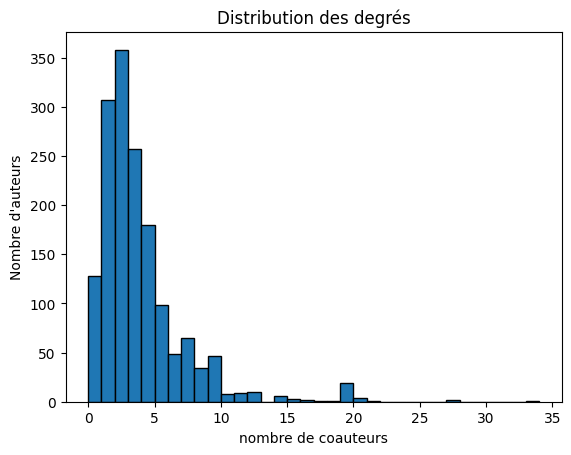

In [ ]:
# Calculer les degrés des nœuds
degrees = [deg for node, deg in G.degree()]

# Tracer l'histogramme de la distribution des degrés
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black')
plt.title("Distribution des degrés")
plt.xlabel("nombre de coauteurs")
plt.ylabel("Nombre d'auteurs")
plt.show()

In [ ]:
# Calculer les degrés de tous les nœuds dans le graphe
degrees = dict(G.degree())

# Trouver le nœud avec le degré maximal
max_degree_node = max(degrees, key=degrees.get)
max_degree_label = G.nodes[max_degree_node]['label']
max_degree = degrees[max_degree_node]

print("Personne avec le degré maximal:", max_degree_label)
print("Degré maximal:", max_degree)

Personne avec le degré maximal: BARABASI, A
Degré maximal: 34


In [ ]:
from tabulate import tabulate
# Collecter les poids des arêtes
edge_weights = [data['value'] for u, v, data in G.edges(data=True)]

# Créer un DataFrame avec les poids des arêtes et leurs fréquences
df = pd.DataFrame(edge_weights, columns=['value'])

# Calculer le poids le plus faible et le poids le plus élevé
lowest_weight = df['value'].min()
highest_weight = df['value'].max()

# Calculer les fréquences des poids des arêtes
weight_frequency = df['value'].value_counts().reset_index()
weight_frequency.columns = ['value', 'Frequency']
weight_frequency = weight_frequency.sort_values(by='value')

# Afficher le tableau avec les poids et leurs fréquences
print("Table 1: Distribution des poids des arêtes dans le réseau NetScience")
print(f"Le poids minimale {lowest_weight} et le poids maximale est {highest_weight}.")

# Afficher le tableau
table_data = weight_frequency.values.tolist()
table_data.insert(0, ['Poids', 'Frequence'])
table_data.append(['Poids minimale', lowest_weight])
table_data.append(['Poids maximale', highest_weight])

print(tabulate(table_data, headers='firstrow', tablefmt='grid'))

Table 1: Distribution des poids des arêtes dans le réseau NetScience
Le poids minimale 0.0526316 et le poids maximale est 4.75.
+----------------+-------------+
| Poids          |   Frequence |
+================+=============+
| 0.0526316      | 187         |
+----------------+-------------+
| 0.111111       | 135         |
+----------------+-------------+
| 0.125          |  82         |
+----------------+-------------+
| 0.142857       | 190         |
+----------------+-------------+
| 0.166667       |  58         |
+----------------+-------------+
| 0.2            | 213         |
+----------------+-------------+
| 0.25           | 383         |
+----------------+-------------+
| 0.333333       | 479         |
+----------------+-------------+
| 0.342857       |   7         |
+----------------+-------------+
| 0.375          |   3         |
+----------------+-------------+
| 0.385965       |   3         |
+----------------+-------------+
| 0.4            |   4         |
+-------------

Arête de poids maximal entre les nœuds : ('PASTORSATORRAS, R', 'VESPIGNANI, A')
TABLE: LINE WEIGHTS DISTRIBUTION
+----+---------------+----------+
|    | Statistique   |   Valeur |
+====+===============+==========+
|  0 | Moyenne       | 0.43399  |
+----+---------------+----------+
|  1 | Médiane       | 0.333333 |
+----+---------------+----------+
|  2 | Écart-type    | 0.426851 |
+----+---------------+----------+


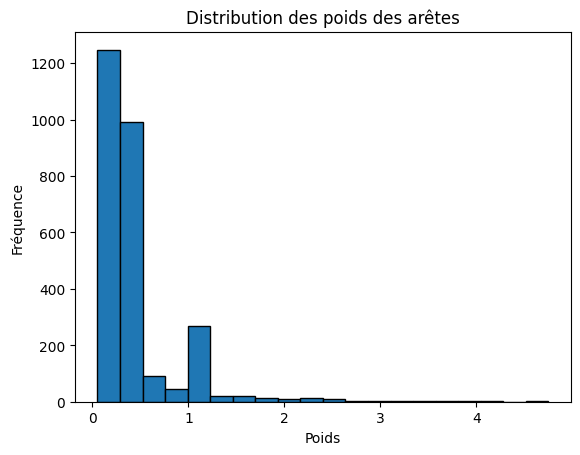

In [ ]:
# Collecter les poids des arêtes
weights = [data['value'] for _, _, data in G.edges(data=True)]

# Obtenir le poids maximal des arêtes
max_weight = max([d['value'] for _, _, d in G.edges(data=True)])

# Obtenir le poids maximal des arêtes
min_weight = min([d['value'] for _, _, d in G.edges(data=True)])

# Parcourir les arêtes et afficher les couples de nœuds avec un poids maximal
for u, v, d in G.edges(data=True):
    if d['value'] == max_weight:
        node_u_label = G.nodes[u]['label']
        node_v_label = G.nodes[v]['label']
        print("Arête de poids maximal entre les nœuds :", (node_u_label, node_v_label))

# Calculer des mesures statistiques
mean_weight = np.mean(weights)
median_weight = np.median(weights)
std_deviation = np.std(weights)

# Créer un DataFrame avec les statistiques
stats_df = pd.DataFrame({
    'Statistique': ['Moyenne', 'Médiane', 'Écart-type'],
    'Valeur': [mean_weight, median_weight, std_deviation]
})

# Afficher le tableau dans une grille
print("TABLE: LINE WEIGHTS DISTRIBUTION")
print(tabulate(stats_df, headers='keys', tablefmt='grid'))

# Tracer l'histogramme de la distribution des poids
plt.hist(weights, bins=20, edgecolor='black')
plt.title('Distribution des poids des arêtes')
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
# Calculer la densité du graphe
density = nx.density(G)
print("Densité du graphe:", density)

# Coefficient de clustering moyen du graphe
clustering_coefficient = nx.average_clustering(G)

print("Coefficient de clustering moyen:", clustering_coefficient)


Densité du graphe: 0.0021733168683312383
Coefficient de clustering moyen: 0.6377905695067805


Un coefficient de clustering moyen de 0.64 signifie que, en moyenne, les voisins de chaque nœud sont assez bien connectés entre eux. Plus précisément, cela indique que les voisins d'un nœud ont environ 64% de chances d'être également connectés entre eux.

environ 0.21% des paires de nœuds possibles sont reliées par des arêtes dans le graphe


In [ ]:
# Calculer le coefficient de clustering pour chaque nœud
clustering_coefficients = nx.clustering(G)

# Afficher les résultats
for node, clustering_coefficient in clustering_coefficients.items():
    print(f"Nœud {node}: Coefficient de clustering = {clustering_coefficient}")


Nœud 0: Coefficient de clustering = 1.0
Nœud 1: Coefficient de clustering = 0.3333333333333333
Nœud 2: Coefficient de clustering = 1.0
Nœud 3: Coefficient de clustering = 1.0
Nœud 4: Coefficient de clustering = 1.0
Nœud 5: Coefficient de clustering = 1.0
Nœud 6: Coefficient de clustering = 1.0
Nœud 7: Coefficient de clustering = 0.5
Nœud 8: Coefficient de clustering = 0
Nœud 9: Coefficient de clustering = 0.26666666666666666
Nœud 10: Coefficient de clustering = 1.0
Nœud 11: Coefficient de clustering = 1.0
Nœud 12: Coefficient de clustering = 0.42857142857142855
Nœud 13: Coefficient de clustering = 1.0
Nœud 14: Coefficient de clustering = 1.0
Nœud 15: Coefficient de clustering = 1.0
Nœud 16: Coefficient de clustering = 1.0
Nœud 17: Coefficient de clustering = 1.0
Nœud 18: Coefficient de clustering = 1.0
Nœud 19: Coefficient de clustering = 0
Nœud 20: Coefficient de clustering = 1.0
Nœud 21: Coefficient de clustering = 1.0
Nœud 22: Coefficient de clustering = 1.0
Nœud 23: Coefficient de 

Un clic dans un graphe est un sous-ensemble de nœuds où chaque nœud est connecté à tous les autres nœuds du sous-ensemble.

##les voisins d'un noeud en donnant le nom de chercheur


In [ ]:
# Étiquette du nœud dont vous voulez trouver les voisins
target_label = 'DURAN, O'

# Recherche de l'identifiant numérique du nœud avec l'étiquette spécifiée
target_node = None
for node, label in nx.get_node_attributes(G, 'label').items():
    if label == target_label:
        target_node = node
        break

if target_node is not None:
    # Récupération des voisins du nœud
    neighbors = list(G.neighbors(target_node))
    print("Les voisins du", target_label,"(",target_node,")", "sont :",  [(neighbor, G.nodes[neighbor]['label']) for neighbor in neighbors])
else:
    print("Aucun nœud trouvé avec l'étiquette", target_label)

Les voisins du DURAN, O ( 911 ) sont : [(909, 'KLEVECZ, R'), (910, 'BOLEN, J')]


##Trouver les chercheurs  que je peux collaborer avec






en tenant compte que vous êtes relié à eux par une arête de poids maximal, vous pouvez utiliser l'algorithme suivant :

Trouvez vos voisins.
Pour chaque voisin, trouvez les voisins de ce voisin.
Vérifiez si vous êtes relié à ce voisin par une arête de poids maximal.
Si oui, vérifiez si ce voisin est relié à un autre voisin par une arête de poids maximal.

In [ ]:
# Nœud donné
node_label = 'DURAN, O'

# Dictionnaire pour stocker les voisins de vos voisins avec un poids maximal
neighbors_max_weight = {}

# Trouver l'identifiant du nœud à partir de son label
node = [n for n, d in G.nodes(data=True) if d['label'] == node_label][0]

# Trouver vos voisins
neighbors = list(G.neighbors(node))

# Parcourir chaque voisin
for neighbor in neighbors:
    # Vérifier si l'arête avec ce voisin a un poids maximal
    max_weight = max(G[node][v]['value'] for v in G.neighbors(node))
    if G[node][neighbor]['value'] == max_weight:
        # Trouver les voisins de ce voisin
        second_neighbors = list(G.neighbors(neighbor))
        # Parcourir chaque voisin de ce voisin
        for second_neighbor in second_neighbors:
            # Vérifier si l'arête entre ce voisin et son voisin a un poids maximal
            if G[neighbor][second_neighbor]['value'] == max(G[neighbor][v]['value'] for v in G.neighbors(neighbor)):
                if neighbor not in neighbors_max_weight:
                    neighbors_max_weight[neighbor] = []
                neighbors_max_weight[neighbor].append(second_neighbor)

# Afficher les voisins de vos voisins avec un poids maximal en utilisant les labels des nœuds
for neighbor, second_neighbors in neighbors_max_weight.items():
    neighbor_label = G.nodes[neighbor]['label']
    second_neighbors_labels = [G.nodes[second_neighbor]['label'] for second_neighbor in second_neighbors]
    print("Voisin:", neighbor_label, "- Voisins des voisins avec poids maximal:", second_neighbors_labels)

Voisin: KLEVECZ, R - Voisins des voisins avec poids maximal: ['BOLEN, J', 'DURAN, O']
Voisin: BOLEN, J - Voisins des voisins avec poids maximal: ['KLEVECZ, R', 'DURAN, O']


##les voisins d'un noeud en donnant numéro de noeud


In [ ]:
# Obtenir les voisins d'un nœud spécifique
node = 1
neighbors = G.neighbors(node)

# Récupérer les étiquettes des voisins
neighbors_with_labels = [(neighbor, G.nodes[neighbor]['label']) for neighbor in neighbors]

# Afficher les voisins avec leurs étiquettes
print("Voisinage du nœud", node, ":", neighbors_with_labels)

Voisinage du nœud 1 : [(0, 'ABRAMSON, G'), (946, 'ZANETTE, D'), (1084, 'MORELLI, L')]


In [ ]:
# Vérifier si un sous-ensemble de nœuds forme un clic
cliques = list(nx.find_cliques(G))

# Afficher les cliques trouvées
for clique in cliques:
    print("Clique found:", clique)

Clique found: [0, 1, 1084]
Clique found: [1, 946]
Clique found: [2, 3, 4, 5, 6]
Clique found: [7, 8]
Clique found: [7, 9, 10, 11]
Clique found: [9, 1424, 1425]
Clique found: [9, 1532]
Clique found: [12, 1047, 1048, 1049, 1050]
Clique found: [12, 13, 14, 15]
Clique found: [16, 17, 18]
Clique found: [19]
Clique found: [20, 21, 22]
Clique found: [23, 24, 25]
Clique found: [24, 25, 201, 202]
Clique found: [24, 25, 369]
Clique found: [26]
Clique found: [27, 28, 29]
Clique found: [31, 32, 30]
Clique found: [33, 131, 34, 30]
Clique found: [33, 485]
Clique found: [33, 1551, 34, 1550]
Clique found: [33, 1295, 376, 377, 375]
Clique found: [33, 464]
Clique found: [33, 1008, 51]
Clique found: [33, 54, 34, 132, 133, 561, 562, 53, 134]
Clique found: [33, 54, 34, 1190, 840, 1191]
Clique found: [33, 54, 34, 839]
Clique found: [33, 54, 34, 840, 30]
Clique found: [33, 54, 34, 1550]
Clique found: [33, 54, 488, 489]
Clique found: [33, 54, 1228, 132, 1229]
Clique found: [33, 54, 51, 52, 53]
Clique found: [

In [ ]:
# Mesures de centralité
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Créer un DataFrame avec les statistiques
stats_df = pd.DataFrame({
    'Statistique': ['degree_centrality', 'betweenness_centrality', 'closeness_centrality'],
    'Valeur': [degree_centrality, betweenness_centrality, closeness_centrality]
})

# Afficher le tableau dans une grille
print(tabulate(stats_df, headers='keys', tablefmt='grid'))

+----+------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Trouver les composantes connectées
connected_components = list(nx.connected_components(G))

# Calculer le nombre de composantes connexes
num_connected_components = nx.number_connected_components(G)
print("Nombre de composantes connectées:", num_connected_components)

# Trouver la plus grande composante connectée
largest_component = max(connected_components, key=len)
print ("La plus grande composant connectée =",largest_component)
#Nombre des noeuds  de la plus grande composante connectée
print("Nombre de nœuds de la plus grande composante connectée:", len(largest_component))

# Créer un sous-graphe contenant seulement la plus grande composante connexe
largest_subgraph = G.subgraph(largest_component)

# Calculer le nombre d'arêtes dans la plus grande composante connexe
num_edges_largest_component = largest_subgraph.number_of_edges()
print("Nombre d'arêtes dans la plus grande composante connexe :", num_edges_largest_component)

# Identifier les nœuds isolés
isolated_nodes = list(nx.isolates(G))
print("Nœuds isolés:", isolated_nodes)

# Initialiser un compteur pour les composantes sans arêtes
components_without_edges = 0

# Analyser chaque composante
for i, component in enumerate(connected_components):
      subgraph = G.subgraph(component)
      if len(nx.edges(G.subgraph(component))) == 0 :
          components_without_edges += 1

print("Nombre des noeuds isolés",components_without_edges)

#Centre de sous graphe
center_nodes = nx.center(largest_subgraph)
print("Le centre du sous graphe la plus large est :", center_nodes)

#Diametre de sous  graphe
diameter = nx.diameter(largest_subgraph)
print("Le diamètre du sous graphe la plus large est :", diameter)

#Rayon de sous graphe
radius = nx.radius(largest_subgraph)
print("Le rayon du sous graphe la plus large est :", radius)


Nombre de composantes connectées: 396
La plus grande composant connectée = {30, 31, 32, 33, 34, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 69, 70, 71, 72, 77, 78, 79, 80, 90, 94, 95, 96, 97, 98, 99, 100, 113, 114, 120, 121, 126, 127, 128, 131, 132, 133, 134, 135, 136, 149, 150, 151, 152, 157, 158, 162, 163, 184, 185, 186, 190, 191, 192, 193, 194, 203, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 233, 234, 235, 251, 252, 262, 263, 264, 265, 266, 267, 268, 269, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 316, 317, 326, 327, 328, 329, 330, 331, 342, 343, 344, 345, 346, 347, 370, 371, 375, 376, 377, 378, 401, 402, 403, 404, 405, 416, 417, 428, 429, 442, 443, 450, 460, 461, 462, 463, 464, 465, 466, 472, 473, 474, 485, 488, 489, 490, 491, 492, 493, 499, 500, 501, 502, 503, 507, 508, 509, 514, 515, 516, 517, 546, 547, 548, 549, 550, 561, 562, 574, 575, 576, 585, 586, 587, 589, 590, 591, 592, 595, 596, 609, 610, 611,

In [ ]:
#Afficher le graphe de plus grand composant

pos = nx.kamada_kawai_layout(largest_subgraph)

# Obtenir les poids des arêtes
edge_weights = nx.get_edge_attributes(largest_subgraph, 'value')
#print(edge_weights)
# Définir une épaisseur de base pour les arêtes
base_edge_width = 3.0

#node_color = [cleaned_graph.degree(v) for v in cleaned_graph]
node_color = [largest_subgraph.degree(v) for v in largest_subgraph]

node_degrees = dict(largest_subgraph.degree())
# Générer une colormap pour mapper les valeurs de degré à des couleurs
cmap = plt.cm.Blues

# Tracer le graphe avec les couleurs des nœuds basées sur leur degré
plt.figure(figsize=(100, 100))

#nx.draw_networkx(cleaned_graph, pos, node_color=node_color,alpha=0.9, with_labels=True, edge_color='.4')
nx.draw_networkx(largest_subgraph, pos, node_color=node_color,alpha=0.9, with_labels=True, edge_color='.4')

# Afficher les poids des arêtes à côté des arêtes
nx.draw_networkx_edge_labels(largest_subgraph, pos, edge_labels=edge_weights)

plt.axis('off')
plt.tight_layout();

In [ ]:

# Calcul du diamètre et du centre de chaque composante connectée
# Trouver les composants connectés
components = list(nx.connected_components(G))
# Parcourir chaque composante connectée
for i, component in enumerate(components):
   component_graph = G.subgraph(component)
   nombre_noeud = nx.number_of_nodes(component_graph)
   nombre_edge = nx.number_of_edges(component_graph)
   diameter = nx.diameter(component_graph)
   center = nx.center(component_graph)
   print(f"Composante {i+1} : {len(component)} noeuds - Diamètre : {diameter}, Centre : {center}, nombre de noeud : {nombre_noeud}, nombre des arrêts : {nombre_edge}")

Composante 1 : 4 noeuds - Diamètre : 2, Centre : [1], nombre de noeud : 4, nombre des arrêts : 4
Composante 2 : 5 noeuds - Diamètre : 1, Centre : [2, 3, 4, 5, 6], nombre de noeud : 5, nombre des arrêts : 10
Composante 3 : 8 noeuds - Diamètre : 3, Centre : [7, 9, 10, 11], nombre de noeud : 8, nombre des arrêts : 11
Composante 4 : 8 noeuds - Diamètre : 2, Centre : [12], nombre de noeud : 8, nombre des arrêts : 16
Composante 5 : 3 noeuds - Diamètre : 1, Centre : [16, 17, 18], nombre de noeud : 3, nombre des arrêts : 3
Composante 6 : 1 noeuds - Diamètre : 0, Centre : [19], nombre de noeud : 1, nombre des arrêts : 0
Composante 7 : 3 noeuds - Diamètre : 1, Centre : [20, 21, 22], nombre de noeud : 3, nombre des arrêts : 3
Composante 8 : 7 noeuds - Diamètre : 3, Centre : [201, 202, 24, 25], nombre de noeud : 7, nombre des arrêts : 12
Composante 9 : 1 noeuds - Diamètre : 0, Centre : [26], nombre de noeud : 1, nombre des arrêts : 0
Composante 10 : 3 noeuds - Diamètre : 1, Centre : [27, 28, 29], 

composante numéro 31 


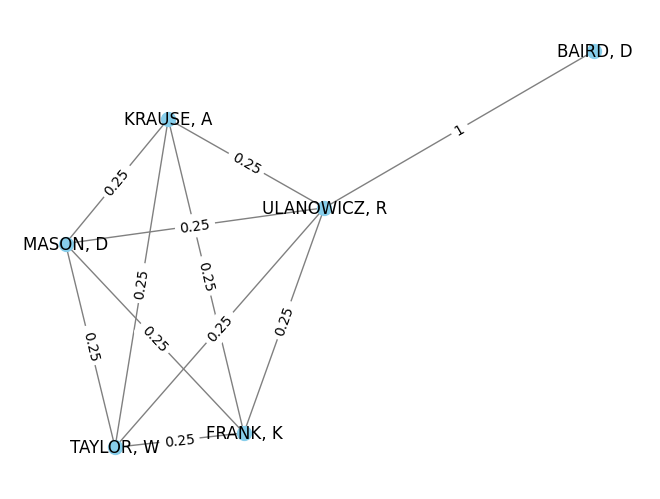

Nombre de noeuds dans le composant 31: 6
Nombre d'arêtes dans le composant 31: 11
composante numéro 281 


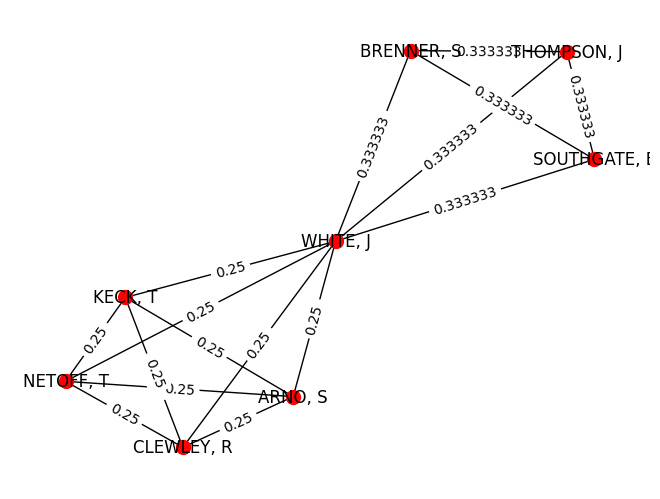

Nombre de noeuds dans le composant 281: 8
Nombre d'arêtes dans le composant 281: 16


In [ ]:
# Dessiner les composants connectés pour visualisation
#import matplotlib.pyplot as plt

print("composante numéro 31 ")
# Sélectionner le composant numéro 31
component_31_nodes = list(components[30])

# Créer un sous-graphe contenant uniquement les nœuds du composant 31
subgraph_31 = G.subgraph(component_31_nodes)

# Récupération des labels des nœuds
labels = {node: subgraph_31.nodes[node]["label"] for node in subgraph_31.nodes}
#labels = nx.get_node_attributes(subgraph_31, 'label')

# Récupération des poids des arêtes
edge_weights = nx.get_edge_attributes(subgraph_31, 'value')

# Positionner les nœuds avec l'algorithme de disposition
pos = nx.spring_layout(subgraph_31)

# Récupération des poids des arêtes
#edge_weights = nx.get_edge_attributes(subgraph_31, 'value')

# Dessiner le sous-graphe avec les arêtes

nx.draw(subgraph_31, pos, with_labels=True,labels=labels, node_color='skyblue', node_size=100, edge_color='gray')

nx.draw_networkx_edge_labels(subgraph_31, pos, edge_labels=edge_weights)

# Afficher le graphe
plt.show()

# Nombre de nœuds dans le composant 31
nb_nodes_component_31 = subgraph_31.number_of_nodes()

# Nombre d'arêtes dans le composant 31
nb_edges_component_31 = subgraph_31.number_of_edges()

print("Nombre de noeuds dans le composant 31:", nb_nodes_component_31)
print("Nombre d'arêtes dans le composant 31:", nb_edges_component_31)

print("composante numéro 281 ")
# Sélectionner le composant numéro 281
component_281_nodes = list(components[280])

# Créer un sous-graphe contenant uniquement les nœuds du composant 281
subgraph_281 = G.subgraph(component_281_nodes)
# Récupération des labels des nœuds
labels = {node: subgraph_281.nodes[node]["label"] for node in subgraph_281.nodes}
# Récupération des poids des arêtes
edge_weights = nx.get_edge_attributes(subgraph_281, 'value')
# Positionner les nœuds avec l'algorithme de disposition
pos = nx.spring_layout(subgraph_281)

# Dessiner le sous-graphe avec les arêtes
nx.draw(subgraph_281, pos, with_labels=True,labels=labels, node_color='red', node_size=100, edge_color='black')
#nx.draw_networkx_edge_labels(subgraph_281, pos, edge_labels=edge_weights)
#nx.draw_networkx_labels(subgraph_281, pos, labels=labels, font_size=8)
nx.draw_networkx_edge_labels(subgraph_281, pos, edge_labels=edge_weights)
# Afficher le graphe
plt.show()

# Nombre de nœuds dans le composant 281
nb_nodes_component_281 = subgraph_281.number_of_nodes()

# Nombre d'arêtes dans le composant 281
nb_edges_component_281 = subgraph_281.number_of_edges()

print("Nombre de noeuds dans le composant 281:", nb_nodes_component_281)
print("Nombre d'arêtes dans le composant 281:", nb_edges_component_281)

##plus court chemin

In [ ]:
# Définir une fonction pour obtenir le nœud correspondant à une étiquette
def get_node_by_label(graph, label):
    for node, data in graph.nodes(data=True):
        if data['label'] == label:
            return node
    return None

# Obtenir les nœuds correspondant aux étiquettes de départ et d'arrivée

start_label = "NETOFF, T"
end_label = "THOMPSON, J"
start_node = get_node_by_label(G, start_label)
end_node = get_node_by_label(G, end_label)

# Vérifier si les étiquettes sont valides
if start_node is None or end_node is None:
    print("L'une des étiquettes n'est pas valide.")
else:
    # Calculer le plus court chemin entre les nœuds correspondants
    shortest_path = nx.shortest_path(G, source=start_node, target=end_node)
    # Mapper les nœuds du chemin aux libellés correspondants
    shortest_path_labels = [G.nodes[node]['label'] for node in shortest_path]

    print("Plus court chemin entre", start_label, "et", end_label, ":", shortest_path_labels)
  #  print("Plus court chemin entre", start_label, "et", end_label, ":", shortest_path)


Plus court chemin entre NETOFF, T et THOMPSON, J : ['NETOFF, T', 'WHITE, J', 'THOMPSON, J']


Liste de voisinages de tous les noeuds

In [ ]:
# Node to determine the neighbors for
#node_id = 2
#print(f'The neighbors of node {node_id} are {list(G.neighbors(node_id))}')

# You can also print it for every node
for node in G.nodes():
   print(f'The neighbors of node {node} are {list(G.neighbors(node))}')

The neighbors of node 2 are [3, 4, 5, 6]
The neighbors of node 0 are [1, 1084]
The neighbors of node 1 are [0, 946, 1084]
The neighbors of node 2 are [3, 4, 5, 6]
The neighbors of node 3 are [2, 4, 5, 6]
The neighbors of node 4 are [2, 3, 5, 6]
The neighbors of node 5 are [2, 3, 4, 6]
The neighbors of node 6 are [2, 3, 4, 5]
The neighbors of node 7 are [8, 9, 10, 11]
The neighbors of node 8 are [7]
The neighbors of node 9 are [7, 10, 11, 1424, 1425, 1532]
The neighbors of node 10 are [7, 9, 11]
The neighbors of node 11 are [7, 10, 9]
The neighbors of node 12 are [13, 14, 15, 1047, 1048, 1049, 1050]
The neighbors of node 13 are [12, 14, 15]
The neighbors of node 14 are [12, 13, 15]
The neighbors of node 15 are [12, 13, 14]
The neighbors of node 16 are [17, 18]
The neighbors of node 17 are [16, 18]
The neighbors of node 18 are [16, 17]
The neighbors of node 19 are []
The neighbors of node 20 are [21, 22]
The neighbors of node 21 are [20, 22]
The neighbors of node 22 are [20, 21]
The neig

##  Identification des communautés

**Determine the communities**

In [ ]:
!pip install cdlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.0 MB/s eta 0:00:00


In [ ]:
import cdlib
from cdlib import algorithms

# Appliquer différents algorithmes de détection de communautés
#Propagation des labels
propagation_label_communities = algorithms.label_propagation(G)


#propagation_label_communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))
# Afficher les informations sur les communautés détectées
print("Communautés détectées par Propagation des labels:")

# Afficher le nombre de communautés détectées
num_communities = len(propagation_label_communities.communities)
print("Nombre de communautés détectées:", num_communities)

# Afficher les communautés individuellement
for i, community in enumerate(propagation_label_communities.communities):
    print(f"Communauté {i+1}: {community}")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'leidenalg', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}
Communautés détectées par Propagation des labels:
Nombre de communautés détectées: 467
Communauté 1: [131, 132, 133, 134, 1550, 1551, 30, 33, 34, 1190, 1191, 685, 561, 562, 51, 52, 53, 54, 57, 58, 190, 839, 840, 1228, 1229, 865, 485, 488, 489, 1008, 760, 1529, 507, 508, 509]
Communauté 2: [1028, 1029, 1553, 1554, 1555, 931, 932, 293, 294, 933, 1464, 1465, 1466, 1467, 1356, 1359, 1368, 1369, 860, 742, 743, 744, 745, 746, 1278]
Communauté 3: [149, 150, 152, 1177, 310, 700, 701, 702, 708, 709, 710, 71, 1481, 1482, 94, 95, 96, 97, 98, 99, 100, 225]
Communauté 4: [645, 1429, 1430, 1431, 1432, 1433, 1

In [ ]:
louvain_communities = algorithms.louvain(G)

# Afficher les informations sur les communautés détectées
print("Communautés détectées par louvain:")

# Afficher le nombre de communautés détectées
num_communities = len(louvain_communities.communities)
print("Nombre de communautés détectées:", num_communities)

# Afficher les communautés individuellement
for i, community in enumerate(louvain_communities.communities):
    print(f"Communauté {i+1}: {community}")

Communautés détectées par louvain:
Nombre de communautés détectées: 404
Communauté 1: [30, 31, 32, 33, 34, 51, 52, 53, 54, 55, 56, 57, 58, 90, 120, 121, 131, 132, 133, 134, 184, 190, 375, 376, 377, 378, 464, 465, 466, 485, 488, 489, 507, 508, 509, 548, 549, 550, 561, 562, 652, 653, 654, 655, 656, 657, 685, 756, 760, 761, 762, 763, 764, 765, 774, 775, 776, 839, 840, 863, 864, 865, 892, 893, 934, 1008, 1024, 1025, 1030, 1130, 1190, 1191, 1228, 1229, 1255, 1263, 1295, 1312, 1313, 1314, 1315, 1316, 1347, 1348, 1461, 1468, 1469, 1470, 1529, 1550, 1551]
Communauté 2: [69, 70, 71, 72, 94, 95, 96, 97, 98, 99, 100, 126, 127, 128, 149, 150, 151, 152, 157, 158, 225, 233, 234, 235, 310, 330, 331, 442, 443, 500, 501, 502, 503, 514, 515, 516, 517, 674, 675, 676, 700, 701, 702, 708, 709, 710, 736, 737, 738, 739, 757, 758, 770, 771, 772, 773, 963, 964, 977, 1021, 1022, 1023, 1082, 1083, 1086, 1087, 1088, 1089, 1177, 1178, 1214, 1215, 1216, 1217, 1221, 1341, 1342, 1460, 1481, 1482, 1556, 1557, 1558]
Co

In [ ]:
infomap_communities = algorithms.infomap(G)

# Afficher les informations sur les communautés détectées
print("Communautés détectées par infomap_communities:")

# Afficher le nombre de communautés détectées
num_communities = len(infomap_communities.communities)
print("Nombre de communautés détectées:", num_communities)

# Afficher les communautés individuellement
for i, community in enumerate(infomap_communities.communities):
    print(f"Communauté {i+1}: {community}")

Communautés détectées par infomap_communities:
Nombre de communautés détectées: 442
Communauté 1: [77, 78, 79, 80, 305, 306, 307, 308, 309, 370, 371, 490, 491, 492, 493, 641, 646, 759, 853, 866, 867, 1005, 1039, 1040, 1121, 1122, 1172, 1195, 1196, 1197, 1549]
Communauté 2: [30, 31, 32, 33, 34, 52, 53, 54, 131, 132, 133, 134, 485, 488, 489, 561, 562, 839, 840, 1024, 1025, 1190, 1191, 1228, 1229, 1529, 1550, 1551]
Communauté 3: [293, 294, 742, 743, 744, 745, 746, 931, 932, 933, 1028, 1029, 1175, 1176, 1278, 1279, 1280, 1281, 1368, 1369, 1553, 1554, 1555]
Communauté 4: [645, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448]
Communauté 5: [149, 150, 151, 152, 225, 514, 515, 516, 517, 674, 963, 964, 1086, 1087, 1088, 1089, 1178, 1341, 1342, 1460]
Communauté 6: [62, 63, 65, 805, 806, 807, 808, 1016, 1070, 1071, 1072, 1073, 1562, 1563, 1564, 1565, 1566, 1567]
Communauté 7: [912, 913, 914, 915, 916, 917, 999, 1000, 1201, 120

In [ ]:
# Données
data = [
    ["Louvain", 404],
    ["Infomap", 442],
    ["Label Propagation", 467]
]

# Entêtes des colonnes
headers = ["Algorithme", "Nombre de communautés ",]

# Affichage du tableau
print(tabulate(data, headers=headers))

Algorithme           Nombre de communautés
-----------------  ------------------------
Louvain                                 405
Infomap                                 442
Label Propagation                       467


In [ ]:
from cdlib import evaluation
# Comparaison des partitions détectées avec l'indice de similarité de Jaccard

# Convertir les partitions en ensembles pour calculer l'indice de similarité de Jaccard
louvain_set = set(map(frozenset, louvain_communities.communities))
infomap_set = set(map(frozenset, infomap_communities.communities))
label_propagation_set = set(map(frozenset, propagation_label_communities.communities))

# Calculer l'intersection et l'union des ensembles pour chaque paire de partitions
intersection_louvain_infomap = len(louvain_set.intersection(infomap_set))
union_louvain_infomap = len(louvain_set.union(infomap_set))

intersection_louvain_label_propagation = len(louvain_set.intersection(label_propagation_set))
union_louvain_label_propagation = len(louvain_set.union(label_propagation_set))

intersection_infomap_label_propagation = len(infomap_set.intersection(label_propagation_set))
union_infomap_label_propagation = len(infomap_set.union(label_propagation_set))

# Calculer l'indice de similarité de Jaccard pour chaque paire de partitions
jaccard_louvain_infomap = intersection_louvain_infomap / union_louvain_infomap
jaccard_louvain_label_propagation = intersection_louvain_label_propagation / union_louvain_label_propagation
jaccard_infomap_label_propagation = intersection_infomap_label_propagation / union_infomap_label_propagation

# Afficher l'indice de similarité de Jaccard entre les partitions
print("Indice de similarité de Jaccard entre Louvain et Infomap:", jaccard_louvain_infomap)
print("Indice de similarité de Jaccard entre Louvain et Propagation des labels:", jaccard_louvain_label_propagation)
print("Indice de similarité de Jaccard entre Infomap et Propagation des labels:", jaccard_infomap_label_propagation)



Indice de similarité de Jaccard entre Louvain et Infomap: 0.8574561403508771
Indice de similarité de Jaccard entre Louvain et Propagation des labels: 0.7942386831275721
Indice de similarité de Jaccard entre Infomap et Propagation des labels: 0.8107569721115537


Pour l'indice de similarité de Jaccard entre Louvain et Infomap, la valeur est d'environ 0.86. Cela signifie que 86% des nœuds sont affectés aux mêmes communautés par ces deux algorithmes.
Pour l'indice de similarité de Jaccard entre Louvain et la Propagation des labels, la valeur est d'environ 0.80. Cela signifie que 80% des nœuds sont affectés aux mêmes communautés par ces deux algorithmes.
Pour l'indice de similarité de Jaccard entre Infomap et la Propagation des labels, la valeur est d'environ 0.82. Cela signifie que 82% des nœuds sont affectés aux mêmes communautés par ces deux algorithmes.

Prédiction des liens

precision du modele 0.4918032786885246
rappel du modele 0.4918032786885246
f1-score du modele 0.6593406593406593


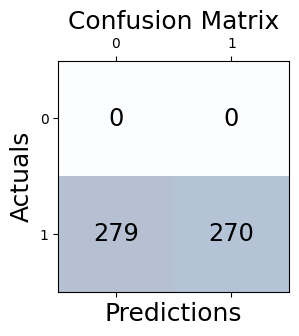

In [ ]:
G=nx.read_gml('/content/netscience.gml')
label_to_index={label:index for index,label in enumerate(G.nodes())}
edges=list(G.edges(data=True))

edges_weight=[(label_to_index[edge[0]],label_to_index[edge[1]],edge[2]['value'])for edge in edges]
true_labels=[1 if G.has_edge(edge[0],edge[1]) else 0 for edge in edges]
#edges_weight=[(edge[0],edge[1],G[edge[0]][edge[1]]['value']) for edge in edges]
num_vertices = len (G.nodes())
adj_matrix=np.zeros((num_vertices,num_vertices))
for edge in edges_weight:
   adj_matrix[edge[0]][edge[1]] = edge[2]
   adj_matrix[edge[1]][edge[0]] = edge[2]

X_train,X_test,y_train,y_test=train_test_split(edges_weight,true_labels,test_size=0.2,random_state=42)
kmeans=KMeans(n_clusters=2,n_init=10)
kmeans.fit(X_train)
predicted_links = kmeans.predict(X_test)
true_labels=[1 if G.has_edge(edge[0],edge[1]) else 0 for edge in X_test]
precision=accuracy_score(y_test,predicted_links)
recall=recall_score(y_test,predicted_links)
f1=f1_score(y_test,predicted_links)
print("precision du modele",precision)
print("rappel du modele",recall)
print("f1-score du modele",f1)
conf_matrix =confusion_matrix(y_test,predicted_links)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()